In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster

In [2]:
df=pd.read_csv('reto_precios (4).csv')
df.head()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,...,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},...,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417


In [3]:
len(df['since'].unique())
#hay 74 fechas de ventas de departamentos

74

In [4]:
columnas=df.columns
columnas

Index(['main_name', 'subtitle', 'link', 'location', 'price', 'attributes',
       'timestamp', 'id', 'address', 'since', 'description', 'vendor', 'lat',
       'lon', 'price_mod', 'price_currency', 'since_period', 'since_value',
       'days_on_site', 'amenities', 'age_in_years', 'bathrooms', 'cellars',
       'num_floors', 'monthly_fee', 'apartments_per_floor', 'disposition',
       'parking_lots', 'floor_situated', 'orientation', 'num_bedrooms',
       'department_type', 'm2', 'final_price', 'price_square_meter'],
      dtype='object')

## VARIABLES A TOMAR EN CUENTA

* since_period
* days_on_site
* amenities
* cellars
* bathrooms
* num_floors
* monthly_fees
* disposition
* parking_lots
* floor_situated
* orientation
* num_bedrooms
* departmnt_type
* price_Square_meter **IMPORTANTE**

(array([  3.,   0.,   0., 961.,   0.,   0.,  12.,   0.,   0.,   5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

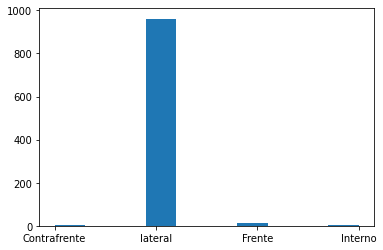

In [5]:
df['disposition'] = df['disposition'].fillna('lateral')
df['disposition'].unique()
#disposicion: como se encuentra posicionada la propiedad
#lateral o interno suelen valer menos
#frente depende, si da a una avenida
#contrafrente puede valer más si da a una área verde o vista abierta
df['orientation']=df['orientation'].replace('Oeste','Poniente')
df['orientation'] = df['orientation'].fillna('otro')
plt.hist(df['disposition'])

(array([942.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

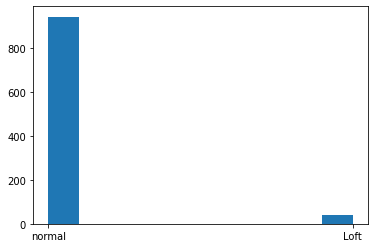

In [6]:
df['department_type']=df['department_type'].fillna('normal')
plt.hist(df['department_type'])

(array([973.,   0.,   4.,   0.,   0.,   2.,   0.,   1.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

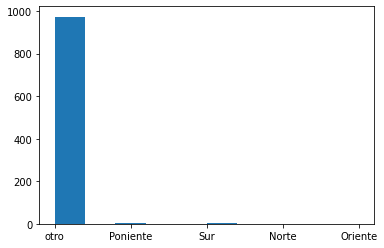

In [7]:
df['amenities']=df['amenities'].fillna(0)
df['cellars']=df['cellars'].fillna(0)
df['bathrooms']=df['bathrooms'].replace(23,2)
plt.hist(df['orientation'])

In [8]:
df['num_floors']=df['num_floors'].fillna(0)

In [9]:
columnas

Index(['main_name', 'subtitle', 'link', 'location', 'price', 'attributes',
       'timestamp', 'id', 'address', 'since', 'description', 'vendor', 'lat',
       'lon', 'price_mod', 'price_currency', 'since_period', 'since_value',
       'days_on_site', 'amenities', 'age_in_years', 'bathrooms', 'cellars',
       'num_floors', 'monthly_fee', 'apartments_per_floor', 'disposition',
       'parking_lots', 'floor_situated', 'orientation', 'num_bedrooms',
       'department_type', 'm2', 'final_price', 'price_square_meter'],
      dtype='object')

In [33]:
df1=df[['disposition','orientation','amenities','cellars','num_bedrooms',
        'num_floors','department_type','m2','price_square_meter']]
df1#haciendo un subset de datos

,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter
0,Contrafrente,otro,3.0,0.0,2.0,1.0,normal,127.0,70866.141732
1,lateral,otro,2.0,0.0,1.0,0.0,normal,54.0,78962.962963
2,lateral,otro,0.0,2.0,3.0,3.0,normal,163.0,49653.374233
3,lateral,Poniente,2.0,0.0,2.0,0.0,Loft,93.0,43010.752688
4,lateral,otro,4.0,0.0,2.0,0.0,normal,103.0,65366.019417
...,...,...,...,...,...,...,...,...,...
976,lateral,otro,0.0,0.0,2.0,0.0,normal,140.0,45607.142857
977,lateral,otro,0.0,0.0,2.0,0.0,normal,84.0,49000.000000
978,lateral,otro,0.0,0.0,2.0,0.0,normal,88.0,48136.363636
979,lateral,otro,0.0,0.0,2.0,0.0,normal,114.0,58071.228070


In [34]:
df1_pvot=df.pivot_table(values=['price_square_meter'],
                       index=['disposition','num_floors'],
                        columns=['amenities'],
                       aggfunc=np.mean,fill_value=0)
df1_pvot#pivot table comparativa

price_square_meter                              \
amenities                              0.0           1.0           2.0   
disposition  num_floors                                                  
Contrafrente 1.0                  0.000000      0.000000      0.000000   
             10.0             77928.571429      0.000000      0.000000   
Frente       0.0              46867.469880      0.000000      0.000000   
             1.0                  0.000000      0.000000  76291.531239   
             2.0              68475.000000      0.000000      0.000000   
             3.0              83916.083916      0.000000      0.000000   
             4.0              68750.390386      0.000000      0.000000   
             6.0              60267.857143      0.000000      0.000000   
             12.0             61788.461538      0.000000      0.000000   
Interno      1.0              55000.000000      0.000000      0.000000   
             2.0              60256.410256      0.000000      0.000000   
             5.0              66765.962333      0.000000      0.000000   
             6.0              68793.000000      0.000000      0.000000   
             10.0             54040.000000      0.000000      0.000000   
lateral      0.0              59295.713173  74249.383073  72594.287640   
             1.0              59613.759730      0.000000      0.000000   
             2.0              56194.392996      0.000000      0.000000   
             3.0              73372.109612      0.000000      0.000000   
             4.0              59775.177814      0.000000      0.000000   
             5.0              65462.310902      0.000000      0.000000   
             6.0              70640.156349      0.000000      0.000000   
             7.0              70676.065791      0.000000      0.000000   
             9.0              58764.705882      0.000000      0.000000   
             10.0             55235.294118      0.000000      0.000000   
             12.0             83026.315789      0.000000      0.000000   

                                                                    \
amenities                          3.0           4.0           5.0   
disposition  num_floors                                              
Contrafrente 1.0          70866.141732      0.000000      0.000000   
             10.0             0.000000      0.000000      0.000000   
Frente       0.0              0.000000      0.000000      0.000000   
             1.0              0.000000      0.000000      0.000000   
             2.0         113504.968383      0.000000      0.000000   
             3.0              0.000000      0.000000      0.000000   
             4.0              0.000000      0.000000      0.000000   
             6.0              0.000000      0.000000      0.000000   
             12.0             0.000000      0.000000      0.000000   
Interno      1.0              0.000000      0.000000      0.000000   
             2.0              0.000000      0.000000      0.000000   
             5.0              0.000000      0.000000      0.000000   
             6.0              0.000000      0.000000      0.000000   
             10.0             0.000000      0.000000      0.000000   
lateral      0.0          69435.060844  58857.669488  58570.929644   
             1.0              0.000000      0.000000      0.000000   
             2.0              0.000000      0.000000      0.000000   
             3.0              0.000000      0.000000      0.000000   
             4.0              0.000000      0.000000      0.000000   
             5.0              0.000000      0.000000      0.000000   
             6.0              0.000000      0.000000      0.000000   
             7.0              0.000000      0.000000      0.000000   
             9.0              0.000000      0.000000      0.000000   
             10.0             0.000000      0.000000      0.000000   
             12.0             0.000000      0.000000      0.0

**los datos confirman que los precios estan mas abalanzados de lado del tipo de disposición igual a contrafrente, no obstate, vale la pena hacer un cluster para ver como se aglutinan los datos**

Realizando otras piot tables para encontrar otros criterios de aumento de propiedades por $m^2$

In [35]:
df_contrafrente=df1[df1['disposition']=='Contrafrente']
df_contrafrente

,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter
0,Contrafrente,otro,3.0,0.0,2.0,1.0,normal,127.0,70866.141732
6,Contrafrente,otro,3.0,0.0,2.0,1.0,normal,127.0,70866.141732
766,Contrafrente,Norte,0.0,0.0,1.0,10.0,normal,42.0,77928.571429


In [36]:
df2_pivot=df.pivot_table(values=['price_square_meter'],
                       index=['orientation'],
                        columns=['amenities'],
                       aggfunc=np.mean,fill_value=0)
df2_pivot #parece que la orientación es un factor relevante en el precio de los imuebles

price_square_meter                                            \
amenities                  0.0           1.0           2.0           3.0   
orientation                                                                
Norte             77928.571429      0.000000      0.000000      0.000000   
Oriente           68475.000000      0.000000      0.000000      0.000000   
Poniente          77898.143523      0.000000  43010.752688      0.000000   
Sur               54327.965709      0.000000      0.000000      0.000000   
otro              59933.677511  74249.383073  73143.953394  71962.893535   

                                                                     \
amenities             4.0           5.0           6.0           7.0   
orientation                                                           
Norte            0.000000      0.000000      0.000000      0.000000   
Oriente          0.000000      0.000000      0.000000      0.000000   
Poniente         0.000000      0.000000      0.000000      0.000000   
Sur              0.000000      0.000000      0.000000      0.000000   
otro         58857.669488  58570.929644  61041.051473  54709.743887   

                           
amenities             8.0  
orientation                
Norte            0.000000  
Oriente          0.000000  
Poniente         0.000000  
Sur              0.000000  
otro         68945.113869

In [37]:
df3_pivot=df.pivot_table(values=['price_square_meter'],
                       index=['num_bedrooms'],
                        columns=['amenities'],
                       aggfunc=np.mean,fill_value=0)
df3_pivot#el numero de habitaciones no parece un factor relevante, no obstante esto no es conclusivo debido a la falta de datos 
#en inmuebles con mas de 1 habitacion

price_square_meter                                            \
amenities                   0.0           1.0           2.0           3.0   
num_bedrooms                                                                
1.0                76695.419426  74249.383073  75208.114008  70575.752194   
2.0                58336.302332      0.000000  69603.712590  61990.369749   
3.0                52653.912294      0.000000      0.000000  90433.288299   
4.0                39161.358959      0.000000      0.000000      0.000000   

                                                                      \
amenities              4.0           5.0           6.0           7.0   
num_bedrooms                                                           
1.0               0.000000      0.000000      0.000000  58150.000000   
2.0           58955.973958  62770.482533  84178.648970  58341.463415   
3.0           37820.512821  55376.903503  59327.155362  54238.278844   
4.0               0.000000      0.000000      0.000000      0.000000   

                            
amenities              8.0  
num_bedrooms                
1.0               0.000000  
2.0               0.000000  
3.0           68945.113869  
4.0               0.000000

In [38]:
df4_pivot=df.pivot_table(values=['price_square_meter'],
                       index=['num_floors'],
                        columns=['amenities'],
                       aggfunc=np.mean,fill_value=0)
df4_pivot#el piso ddonde se encuentra ubicado el departamento es un factor, generalmente a mayor nivel, mas caro

price_square_meter                                             \
amenities                 0.0           1.0           2.0            3.0   
num_floors                                                                 
0.0              59264.873860  74249.383073  72594.287640   69435.060844   
1.0              59413.161481      0.000000  76291.531239   70866.141732   
2.0              60280.049062      0.000000      0.000000  113504.968383   
3.0              74690.106400      0.000000      0.000000       0.000000   
4.0              61570.220328      0.000000      0.000000       0.000000   
5.0              65592.676045      0.000000      0.000000       0.000000   
6.0              69112.724405      0.000000      0.000000       0.000000   
7.0              70676.065791      0.000000      0.000000       0.000000   
9.0              58764.705882      0.000000      0.000000       0.000000   
10.0             62401.288515      0.000000      0.000000       0.000000   
12.0             72407.388664      0.000000      0.000000       0.000000   

                                                                    \
amenities            4.0           5.0           6.0           7.0   
num_floors                                                           
0.0         58857.669488  58570.929644  61041.051473  54410.351026   
1.0             0.000000      0.000000      0.000000  56106.910569   
2.0             0.000000      0.000000      0.000000      0.000000   
3.0             0.000000      0.000000      0.000000      0.000000   
4.0             0.000000      0.000000      0.000000      0.000000   
5.0             0.000000      0.000000      0.000000      0.000000   
6.0             0.000000      0.000000      0.000000      0.000000   
7.0             0.000000      0.000000      0.000000      0.000000   
9.0             0.000000      0.000000      0.000000      0.000000   
10.0            0.000000      0.000000      0.000000      0.000000   
12.0            0.000000      0.000000      0.000000      0.000000   

                          
amenities            8.0  
num_floors                
0.0         68945.113869  
1.0             0.000000  
2.0             0.000000  
3.0             0.000000  
4.0             0.000000  
5.0             0.000000  
6.0             0.000000  
7.0             0.000000  
9.0             0.000000  
10.0            0.000000  
12.0            0.000000

In [39]:
df1[df1['num_floors']==0]

,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter
1,lateral,otro,2.0,0.0,1.0,0.0,normal,54.0,78962.962963
3,lateral,Poniente,2.0,0.0,2.0,0.0,Loft,93.0,43010.752688
4,lateral,otro,4.0,0.0,2.0,0.0,normal,103.0,65366.019417
5,lateral,otro,3.0,0.0,2.0,0.0,normal,67.0,47761.194030
7,lateral,otro,0.0,0.0,2.0,0.0,normal,112.0,49553.571429
...,...,...,...,...,...,...,...,...,...
975,lateral,otro,0.0,0.0,2.0,0.0,normal,164.0,39731.707317
976,lateral,otro,0.0,0.0,2.0,0.0,normal,140.0,45607.142857
977,lateral,otro,0.0,0.0,2.0,0.0,normal,84.0,49000.000000
978,lateral,otro,0.0,0.0,2.0,0.0,normal,88.0,48136.363636


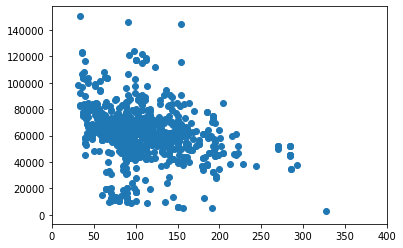

In [40]:
plt.scatter(df1['m2'],df1['price_square_meter'])
plt.xlim(0,400)
a=df1['m2']
b=df1['price_square_meter']

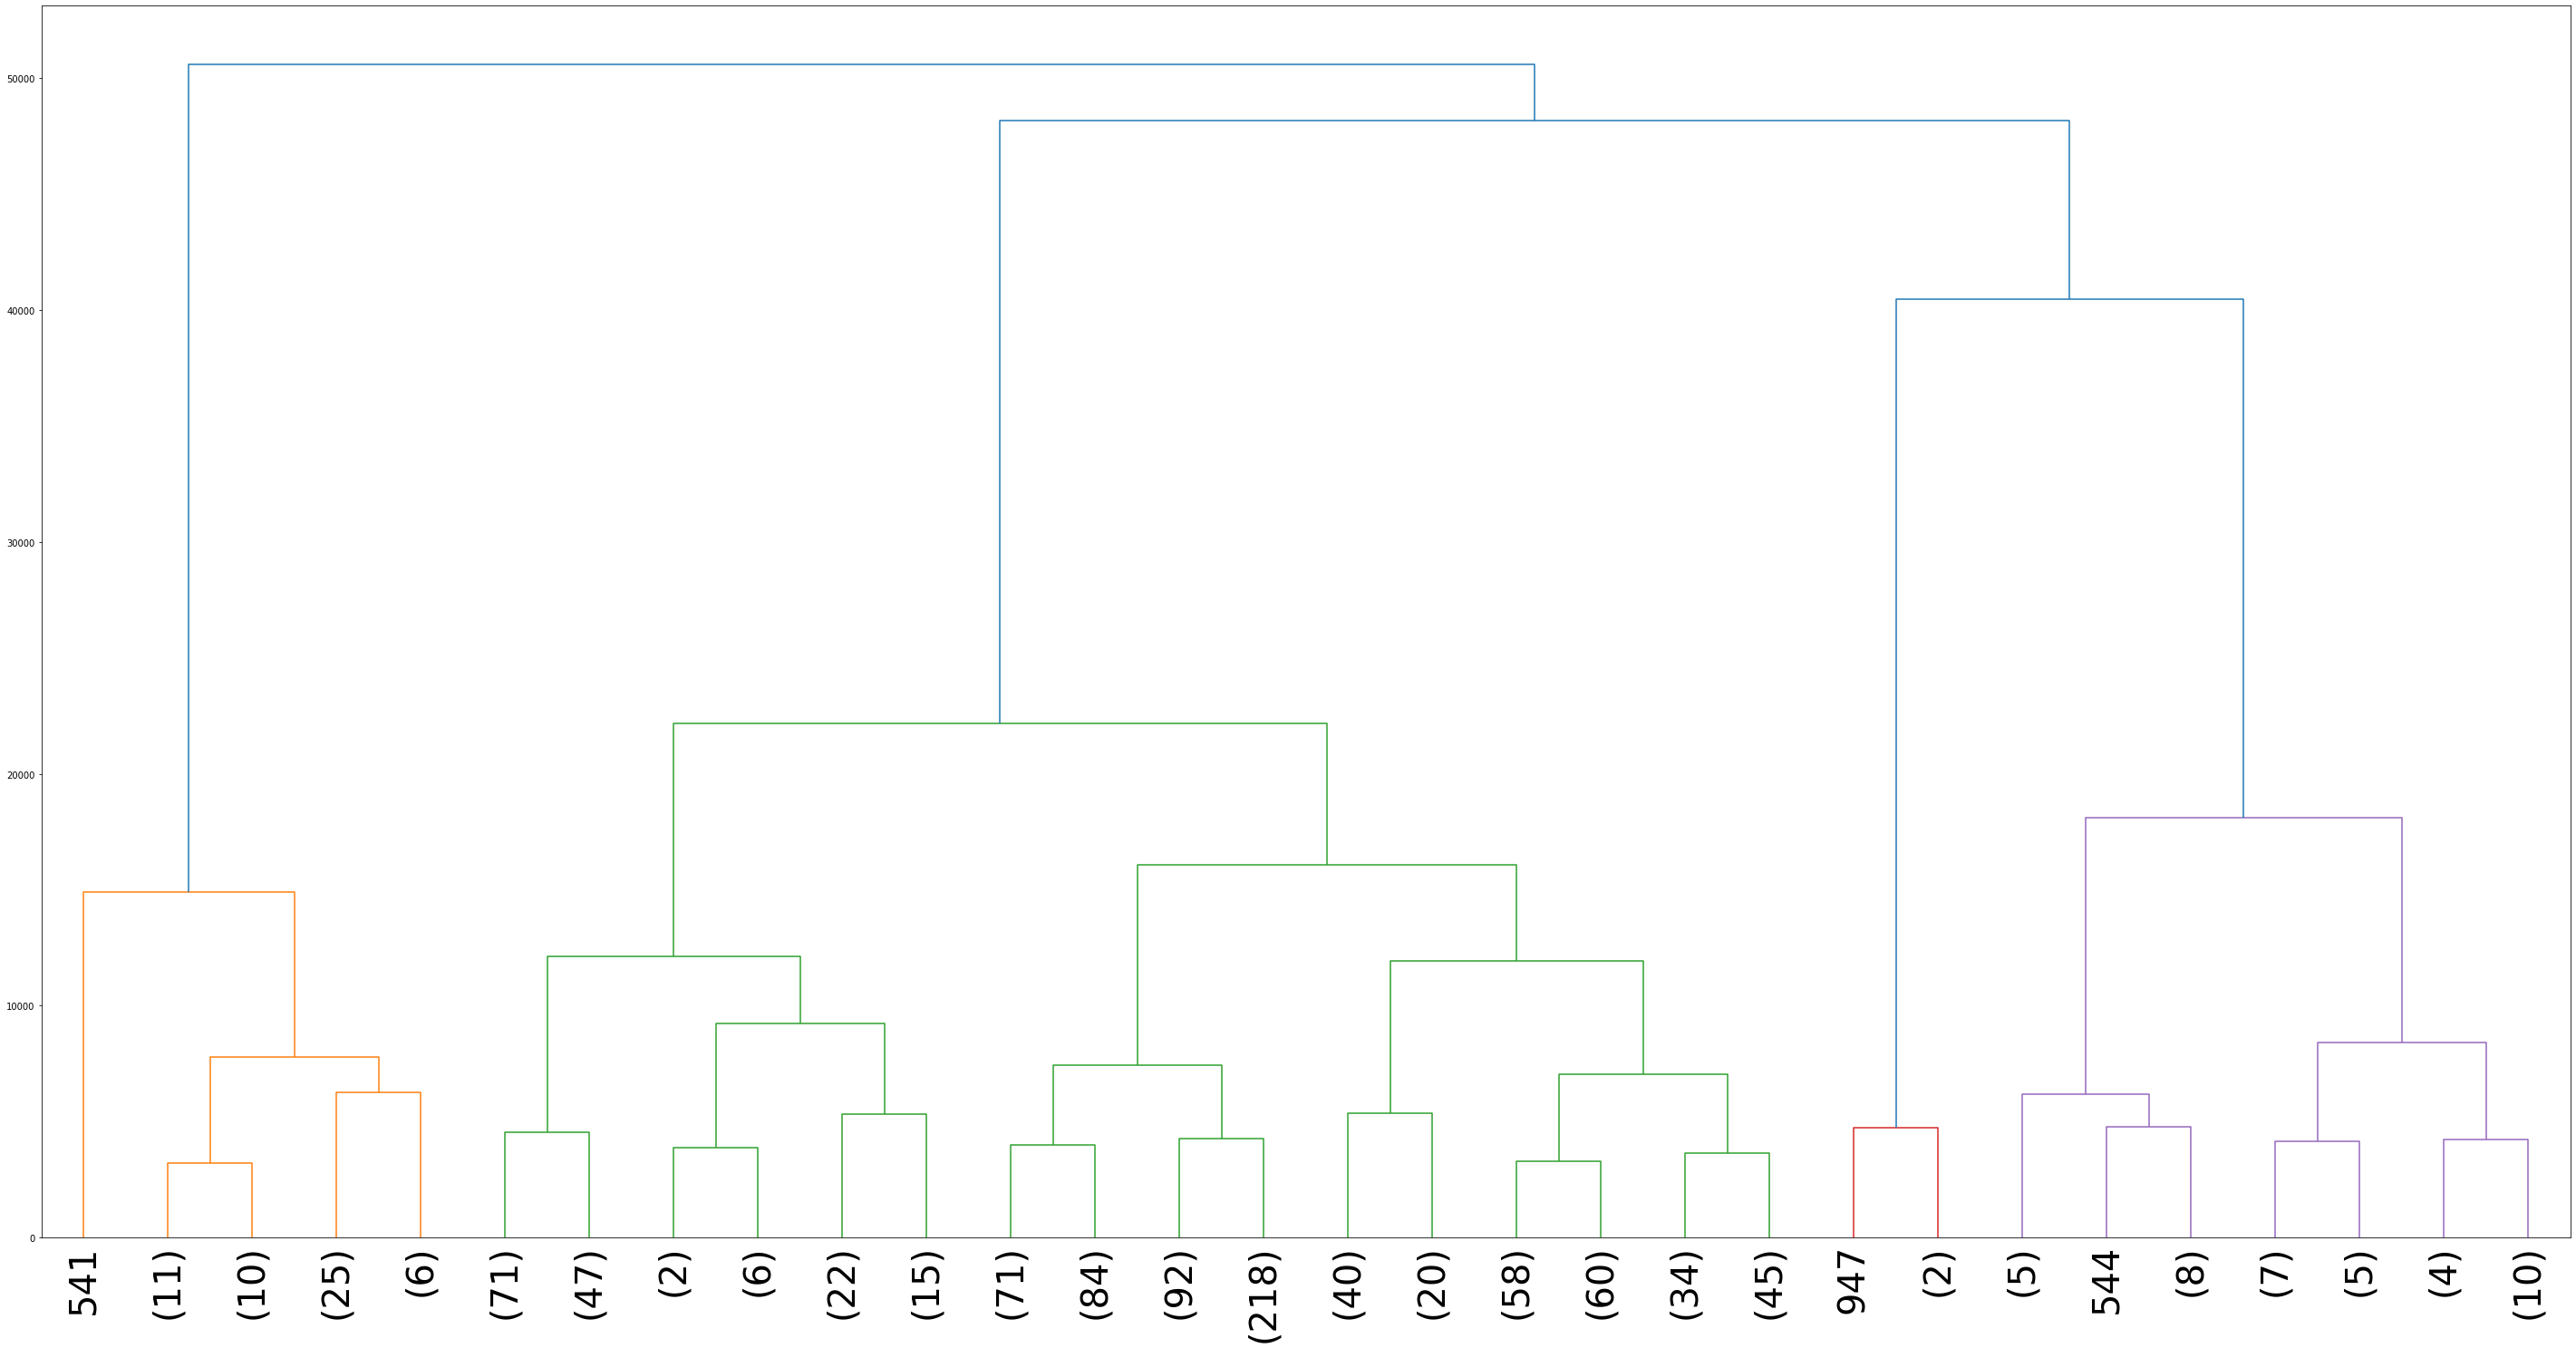

In [41]:
X = np.concatenate((a,b))
df1_5=df1[['m2','price_square_meter']]
Z = linkage(df1_5,'average')
plt.figure(figsize=(50,25))
dendrogram(Z,leaf_rotation=90.,leaf_font_size=40,truncate_mode="lastp")
plt.show()#haciendo un dendograma para diferenciar los cumulos (clusters) de los datos

In [42]:
c, coph_dist = cophenet(Z, pdist(df1_5))
c

0.8343229232915309

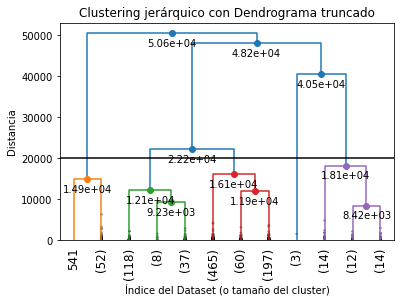

In [43]:
#haciendo un dendograma tunneado
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20000)

plt.show()#el tunneado es para visualizar en el dendograma cual es la distancia de los centroides optima para cada cumulo

[50593.6222896  48157.05429991 40461.80880498 22186.12482734
 18120.10291164 16083.64652705 14897.15131756 12138.27686086
 11930.70995652  9225.74117092  8421.1225483   7798.74304175
  7441.79929949  7046.98271047  6271.4638121   6204.92968456
  5366.59942908  5326.71168394  4783.13595598  4753.50574292
  4558.89384241  4276.57458856  4217.51056523  4163.04753039
  3981.30026814  3887.14995881  3641.09409983  3293.24423638
  3215.999336    3148.9017801   2933.9803079   2890.42851455
  2765.8896627   2752.21870557  2659.24542476  2369.27597487
  2280.06850535  2206.87863778  2200.84932364  2110.22971027
  2090.57966704  2089.40106969  1905.2755445   1817.57122981
  1785.81588952  1762.61835934  1754.44182402  1654.82414715
  1566.13617878  1530.31535409  1525.67491714  1517.1820057
  1507.04729578  1481.211612    1475.45123819  1470.89045165
  1392.68086005  1369.09502126  1303.40939225  1291.64336318
  1290.81650533  1263.47759054  1232.13703546  1224.5379769
  1212.14384434  1186.0775

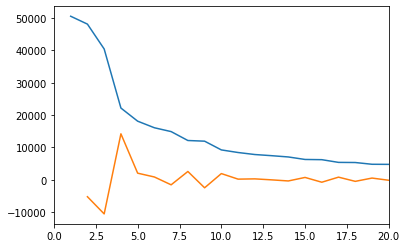

El número óptimo de cluster es 4


In [44]:
depth = 10
incons = inconsistent(Z, depth)
incons[-10:]

last = Z[-500:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.xlim(0,20)
plt.show()
k = acc_rev.argmax() + 2

print("El número óptimo de cluster es %s"%str(k))
#este proceso nos ayuda para ver cuantos cumulos son los necesarios para hacer describir la muestra

In [45]:
#haciendo clusters mas bonitos
max_d=20000
clusters = fcluster(Z, max_d, criterion="distance")
clusters#coloreando e identificando clusters

array([3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 5, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 5, 3, 3,
       2, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3,

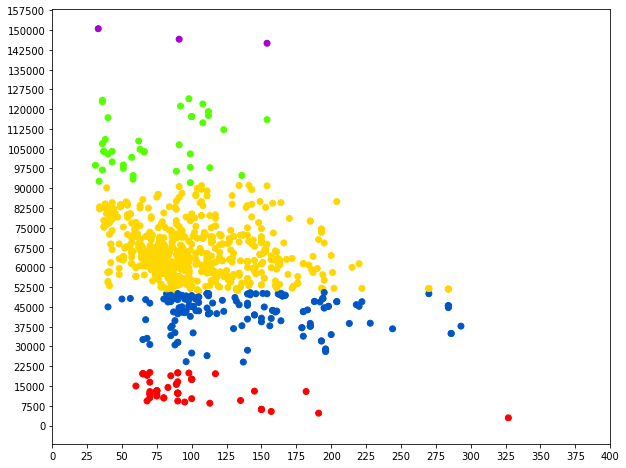

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(df1_5['m2'], df1_5['price_square_meter'], c = clusters, cmap="prism")
plt.xlim(20,400)
plt.xticks(range(0,410,25))
plt.yticks(range(0,160000,7500))

plt.show()#trazando los datos separandolos con los clusters

In [81]:
grupo1=df1[
    (df1['m2']>50) & (df1['m2']<200) &
    (df1['price_square_meter']>0) & (df1['price_square_meter']<=22500)
]
grupo1['grupo']=1
#grupo1['disposition'].unique()
#grupo1['amenities'].unique()
grupo1['num_bedrooms'].unique()
grupo1['num_floors'].unique()
grupo1['department_type'].unique()
grupo1

C:\Users\mikea\AppData\Local\Temp/ipykernel_26572/2101695336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo1['grupo']=1


,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter,grupo
219,lateral,otro,0.0,0.0,2.0,0.0,normal,80.0,10495.650000,1
351,lateral,otro,0.0,0.0,3.0,0.0,normal,100.0,17583.200000,1
469,lateral,otro,0.0,0.0,3.0,0.0,normal,157.0,5351.968153,1
475,lateral,otro,0.0,0.0,2.0,0.0,normal,150.0,6133.333333,1
559,lateral,otro,0.0,0.0,3.0,0.0,normal,75.0,12012.013333,1
658,lateral,otro,0.0,0.0,2.0,0.0,normal,83.0,14457.831325,1
702,lateral,otro,0.0,0.0,2.0,0.0,normal,75.0,11201.933333,1
703,lateral,otro,0.0,0.0,3.0,0.0,normal,70.0,12885.714286,1
704,lateral,otro,0.0,0.0,2.0,0.0,normal,70.0,11995.028571,1
715,lateral,otro,0.0,0.0,2.0,0.0,normal,182.0,12912.087912,1


In [82]:
grupo2=df1[
    (df1['m2']>50) & (df1['m2']<300) &
    (df1['price_square_meter']>22500) & (df1['price_square_meter']<=49000)
]
grupo2['disposition'].unique()
grupo2['amenities'].unique()
grupo2['num_bedrooms'].unique()
grupo2['num_floors'].unique()
grupo2['department_type'].unique()
grupo2['grupo']=2

C:\Users\mikea\AppData\Local\Temp/ipykernel_26572/3758634730.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo2['grupo']=2


In [83]:
grupo3=df1[
    (df1['m2']>50) & (df1['m2']<225) &
    (df1['price_square_meter']>49000) & (df1['price_square_meter']<=90000)
]
grupo3['disposition'].unique()
grupo3['amenities'].unique()
grupo3['num_bedrooms'].unique()
grupo3['num_floors'].unique()
grupo3['department_type'].unique()
grupo3['grupo']=3
grupo3

C:\Users\mikea\AppData\Local\Temp/ipykernel_26572/1740824741.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo3['grupo']=3


,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter,grupo
0,Contrafrente,otro,3.0,0.0,2.0,1.0,normal,127.0,70866.141732,3
1,lateral,otro,2.0,0.0,1.0,0.0,normal,54.0,78962.962963,3
2,lateral,otro,0.0,2.0,3.0,3.0,normal,163.0,49653.374233,3
4,lateral,otro,4.0,0.0,2.0,0.0,normal,103.0,65366.019417,3
6,Contrafrente,otro,3.0,0.0,2.0,1.0,normal,127.0,70866.141732,3
...,...,...,...,...,...,...,...,...,...,...
972,lateral,otro,2.0,0.0,1.0,0.0,normal,75.0,86666.666667,3
973,lateral,otro,5.0,0.0,2.0,0.0,normal,141.0,53191.489362,3
974,lateral,otro,5.0,0.0,2.0,0.0,normal,129.0,56201.550388,3
979,lateral,otro,0.0,0.0,2.0,0.0,normal,114.0,58071.228070,3


In [84]:
grupo4=df1[
    (df1['m2']>50) & (df1['m2']<150) &
    (df1['price_square_meter']>90000)
]
grupo4['disposition'].unique()
grupo4['amenities'].unique()
grupo4['num_bedrooms'].unique()
grupo4['num_floors'].unique()
grupo4['department_type'].unique()
grupo4['grupo']=4

C:\Users\mikea\AppData\Local\Temp/ipykernel_26572/3371950391.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupo4['grupo']=4


In [92]:
concatenate=pd.concat([grupo1,grupo2,grupo3,grupo4],axis=0)
concatenate['price_square_meter']=np.round(concatenate['price_square_meter'],2)
concatenate.to_csv('revision.csv',index=False,encoding='utf-8')

In [93]:
concatenate

,disposition,orientation,amenities,cellars,num_bedrooms,num_floors,department_type,m2,price_square_meter,grupo
219,lateral,otro,0.0,0.0,2.0,0.0,normal,80.0,10495.65,1
351,lateral,otro,0.0,0.0,3.0,0.0,normal,100.0,17583.20,1
469,lateral,otro,0.0,0.0,3.0,0.0,normal,157.0,5351.97,1
475,lateral,otro,0.0,0.0,2.0,0.0,normal,150.0,6133.33,1
559,lateral,otro,0.0,0.0,3.0,0.0,normal,75.0,12012.01,1
...,...,...,...,...,...,...,...,...,...,...
819,lateral,otro,5.0,0.0,2.0,0.0,normal,112.0,119051.04,4
825,lateral,otro,0.0,0.0,2.0,0.0,normal,66.0,103833.33,4
868,lateral,otro,0.0,0.0,2.0,0.0,normal,141.0,91059.89,4
874,lateral,otro,0.0,0.0,2.0,0.0,normal,134.0,91068.19,4
